Назовём функцию, зависящую от трёх параметров — a, b, c — решающим пнём, если:

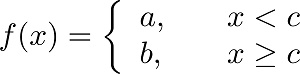

Пусть у нас есть $n$ пар чисел $(x_1,y_1),...,(x_n,y_n)$. Необходимо подобрать $a,b,c$ таким образом, чтобы значение $f(x_i)$ было максимально близко к $y_i$.

Более формально, нужно минимизировать

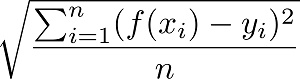

Решение будет зачтено, если относительная или абсолютная ошибка полученной целевой функции не превышает $10^{-3}$.

**Формат ввода**

Для каждого теста в первой строке указано натуральное число $n≤100000$.

Каждая из следующих n строк содержит по 2 целых числа: $x_i$ и $y_i$. $x_i$ не превосходит $10^9$ по абсолютной величине, $y_i$ не превосходит $10^3$ по абсолютной величине.

**Формат вывода**

Выведите 3 числа с точностью как минимум 6 значащих цифр после десятичной точки, которые соответствуют оптимальному набору $a, b, c$. Если существует несколько оптимальных решений, выберите любое из них.

**Ввод**

4

0 1

1 1

2 0

3 0

**Вывод**

1.0000000 0.0000000 1.5000000

# решение в лоб по времени не укладывается
# теперь делаем более красивое

# класс, который хранит только разность и количество
# для вычисления среднего значения в массиве

# решение на Python также не проходит по времени
class MeanCalculator:
    def __init__(self):
        self.Count = 0.
        self.Mean = 0.

    def Add(self, value, weight = 1.):
        self.Count += weight
        self.Mean += weight * (value - self.Mean) / self.Count

    def Remove(self, value, weight = 1.):
        self.Add(value, -weight)

# класс для вычисления минимальной функции потерь
class SumSquaredErrorsCalculator:
    def __init__(self):
        self.MeanCalculator = MeanCalculator()
        self.SSE = 0.

    def Add(self, value, weight = 1.):
        curDiff = value - self.MeanCalculator.Mean
        self.MeanCalculator.Add(value, weight)
        self.SSE += weight * curDiff * (value - self.MeanCalculator.Mean)

    def Remove(self, value, weight = 1.):
        self.Add(value, -weight)

# класс для хранения чисел
class Samples:
    def __init__(self):
        self.Items = []
        self.OverAllSSE = SumSquaredErrorsCalculator()

    def Read(self):
        n = int(input())

        for i in range(n):
            x, y = list(map(int, input().split()))
            self.Items.append([x, y])
            self.OverAllSSE.Add(y)

        self.Items.sort()
    
    def BestSplit(self):
        left = SumSquaredErrorsCalculator()
        right = self.OverAllSSE

        bestA = 0
        bestB = right.MeanCalculator.Mean
        bestC = self.Items[0][0]

        bestQ = right.SSE

        for i in range(len(self.Items) - 1):
            item = self.Items[i]
            nextItem = self.Items[i + 1]

            left.Add(item[1])
            right.Remove(item[1])

            if item[0] == nextItem[0]:
                continue

            a = left.MeanCalculator.Mean
            b = right.MeanCalculator.Mean
            c = (item[0] + nextItem[0]) / 2

            q = left.SSE + right.SSE

            if q < bestQ:
                bestA = a
                bestB = b
                bestC = c
                bestQ = q

        return bestA, bestB, bestC

instances = Samples()
instances.Read()
a, b, c = instances.BestSplit()

print(f'{a:.6f}', f'{b:.6f}', f'{c:.6f}')

Переписав это решение на C++ проблема с преодолением времени решена.

In [ ]:
#include <iostream>
#include <vector>
#include <algorithm>

class MeanCalculator {
public:
    double Count;
    double Mean;

    MeanCalculator() {
        Count = 0.0;
        Mean = 0.0;
    }

    void Add(double value, double weight = 1.0) {
        Count += weight;
        Mean += weight * (value - Mean) / Count;
    }

    void Remove(double value, double weight = 1.0) {
        Add(value, -weight);
    }
};

class SumSquaredErrorsCalculator {
public:
    MeanCalculator meanCalc;  // Переименовано с MeanCalculator
    double SSE;

    SumSquaredErrorsCalculator() {
        SSE = 0.0;
    }

    void Add(double value, double weight = 1.0) {
        double curDiff = value - meanCalc.Mean;
        meanCalc.Add(value, weight);
        SSE += weight * curDiff * (value - meanCalc.Mean);
    }

    void Remove(double value, double weight = 1.0) {
        Add(value, -weight);
    }
};

class Samples {
public:
    std::vector<std::pair<int, int>> Items;
    SumSquaredErrorsCalculator OverAllSSE;

    void Read() {
        int n;
        std::cin >> n;

        for (int i = 0; i < n; ++i) {
            int x, y;
            std::cin >> x >> y;
            Items.push_back({x, y});
            OverAllSSE.Add(y);
        }

        std::sort(Items.begin(), Items.end());
    }

    std::tuple<double, double, double> BestSplit() {
        SumSquaredErrorsCalculator left;
        SumSquaredErrorsCalculator right = OverAllSSE;

        double bestA = 0.0;
        double bestB = right.meanCalc.Mean;  // Переименовано с MeanCalculator
        double bestC = Items[0].first;

        double bestQ = right.SSE;

        for (int i = 0; i < Items.size() - 1; ++i) {
            const auto& item = Items[i];
            const auto& nextItem = Items[i + 1];

            left.Add(item.second);
            right.Remove(item.second);

            if (item.first == nextItem.first) {
                continue;
            }

            double a = left.meanCalc.Mean;  // Переименовано с MeanCalculator
            double b = right.meanCalc.Mean;  // Переименовано с MeanCalculator
            double c = (item.first + nextItem.first) / 2.0;

            double q = left.SSE + right.SSE;

            if (q < bestQ) {
                bestA = a;
                bestB = b;
                bestC = c;
                bestQ = q;
            }
        }

        return std::make_tuple(bestA, bestB, bestC);
    }
};

int main() {
    Samples instances;
    instances.Read();
    auto [a, b, c] = instances.BestSplit();

    std::cout.precision(6);
    std::cout << std::fixed;
    std::cout << a << " " << b << " " << c << std::endl;

    return 0;
}